# Task1_Bank_Customer_Churn_Prediction


In [109]:
# For this machine Learning Model following are the necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np


from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);


In [11]:
# reading the data from the file.
df = pd.read_csv('C:/Users/gb/Downloads/Task/t1/Churn_Modelling.csv')

#EDA(Exploratory Data Analysis)
#head it will display 1st 5 record.
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [12]:
#now we will see the size of dataset

df.shape

(10000, 14)

In [13]:
# Feature information
df.info()

#in following o/p we can se we dont have any null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
# Descriptive statistics of the data set
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
5%,500.95000,1.557882e+07,489.000000,25.000000,1.000000,0.000000,1.000000,0.00000,0.000000,9851.818500,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
90%,9000.10000,1.579083e+07,778.000000,53.000000,9.000000,149244.792000,2.000000,1.00000,1.000000,179674.704000,1.000000
95%,9500.05000,1.580303e+07,812.000000,60.000000,9.000000,162711.669000,2.000000,1.00000,1.000000,190155.375500,1.000000


In [15]:
# categorical Variables
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=11
                        and col not in "Exited"]

categorical_variables

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember']

In [16]:
# Numeric Variables
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                        and col not in "CustomerId"]
numeric_variables

['RowNumber', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [17]:
#we can also check null values by following command
df.isnull().head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
#Or
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [19]:
#Checking Data types
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Exited (Dependent Variable)

Exited
0    7963
1    2037
Name: count, dtype: int64


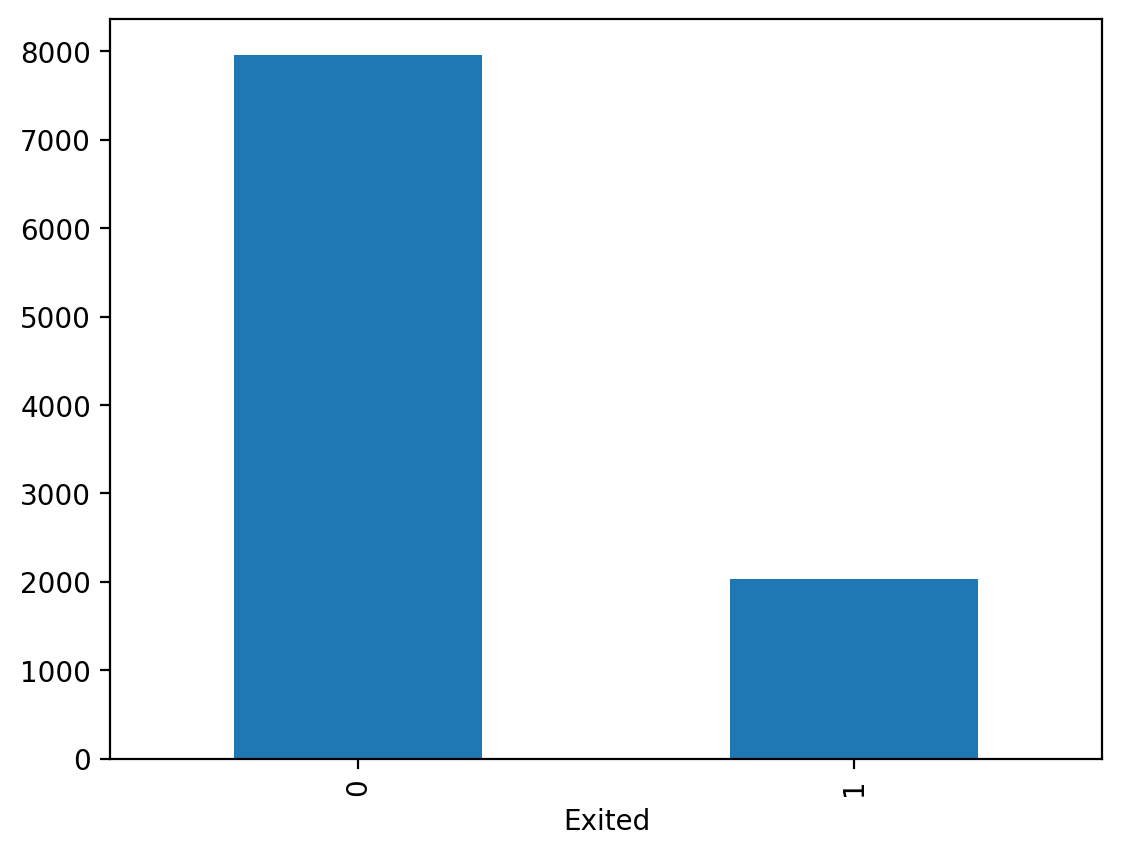

In [20]:
#Counting 1 and 0 Value in Churn column

#df["Exited"].value_counts() -> gives u count of O's and 1's 

color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["Exited"].map(lambda x: color_wheel.get(x + 1))
print(df.Exited.value_counts())
p=df.Exited.value_counts().plot(kind="bar")




# Categorical Variables

are discrete values that can be grouped into following categories 

# Tenure , NumOfProducts, HasCrCard, IsActiveMember
# Geography , Gender

# Tenure

In [21]:
# Customers leaving the bank
cust_exited = df.loc[df["Exited"]==1]

In [22]:
# Customers who did not leave the bank
cust_nonexited = df.loc[df["Exited"]==0]

In [23]:
# Frequency of not_churn group according to Tenure
cust_nonexited["Tenure"].value_counts().sort_values()

Tenure
0     318
10    389
6     771
9     771
4     786
3     796
1     803
5     803
8     828
2     847
7     851
Name: count, dtype: int64

In [24]:
# Frequency of churn group according to Tenure
cust_exited["Tenure"].value_counts().sort_values()

Tenure
0      95
10    101
7     177
6     196
8     197
2     201
4     203
5     209
3     213
9     213
1     232
Name: count, dtype: int64

# NumOfProducts

In [25]:
# Frequency of cust_nonexited group according to NumOfProducts
cust_nonexited["NumOfProducts"].value_counts().sort_values()

NumOfProducts
3      46
1    3675
2    4242
Name: count, dtype: int64

In [26]:
# Frequency of cust_exited group according to NumOfProducts
cust_exited["NumOfProducts"].value_counts().sort_values()

NumOfProducts
4      60
3     220
2     348
1    1409
Name: count, dtype: int64

# HasCrCard

In [27]:
# examining the HasCrCard of the cust_nonexited group
cust_nonexited["HasCrCard"].value_counts()

HasCrCard
1    5631
0    2332
Name: count, dtype: int64

In [28]:
# examining the HasCrCard of the cust_exited group
cust_exited["HasCrCard"].value_counts()

HasCrCard
1    1424
0     613
Name: count, dtype: int64

# IsActiveMember

In [29]:
# examining the IsActiveMember of the cust_nonexited group
cust_nonexited["IsActiveMember"].value_counts()

IsActiveMember
1    4416
0    3547
Name: count, dtype: int64

In [30]:
# examining the IsActiveMember of the cust_exited group
cust_exited["IsActiveMember"].value_counts()

IsActiveMember
0    1302
1     735
Name: count, dtype: int64

# Geography

In [31]:
# Frequency of cust_nonexited group according to Geography
cust_nonexited.Geography.value_counts().sort_values()

Geography
Germany    1695
Spain      2064
France     4204
Name: count, dtype: int64

In [32]:
# Frequency of cust_exited group according to Geography
cust_exited.Geography.value_counts().sort_values()

Geography
Spain      413
France     810
Germany    814
Name: count, dtype: int64

# Gender

In [33]:
# Frequency of cust_nonexited group according to Gender
cust_nonexited.Gender.value_counts()

Gender
Male      4559
Female    3404
Name: count, dtype: int64

In [34]:
# Frequency of churn group according to Gender
cust_exited.Gender.value_counts()

Gender
Female    1139
Male       898
Name: count, dtype: int64

# Numerical Variables
are continuous values that can be measured on a scale ,can be used in machine learning algorithms directly.
includes 

# CreditScore , Age , Balance , EstimatedSalary

# CreditScore

In [35]:
# Let's examine the credit score of the cust_nonexited group
cust_nonexited["CreditScore"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    7963.000000
mean      651.853196
std        95.653837
min       405.000000
5%        492.000000
25%       585.000000
50%       653.000000
75%       718.000000
90%       778.000000
95%       812.000000
99%       850.000000
max       850.000000
Name: CreditScore, dtype: float64

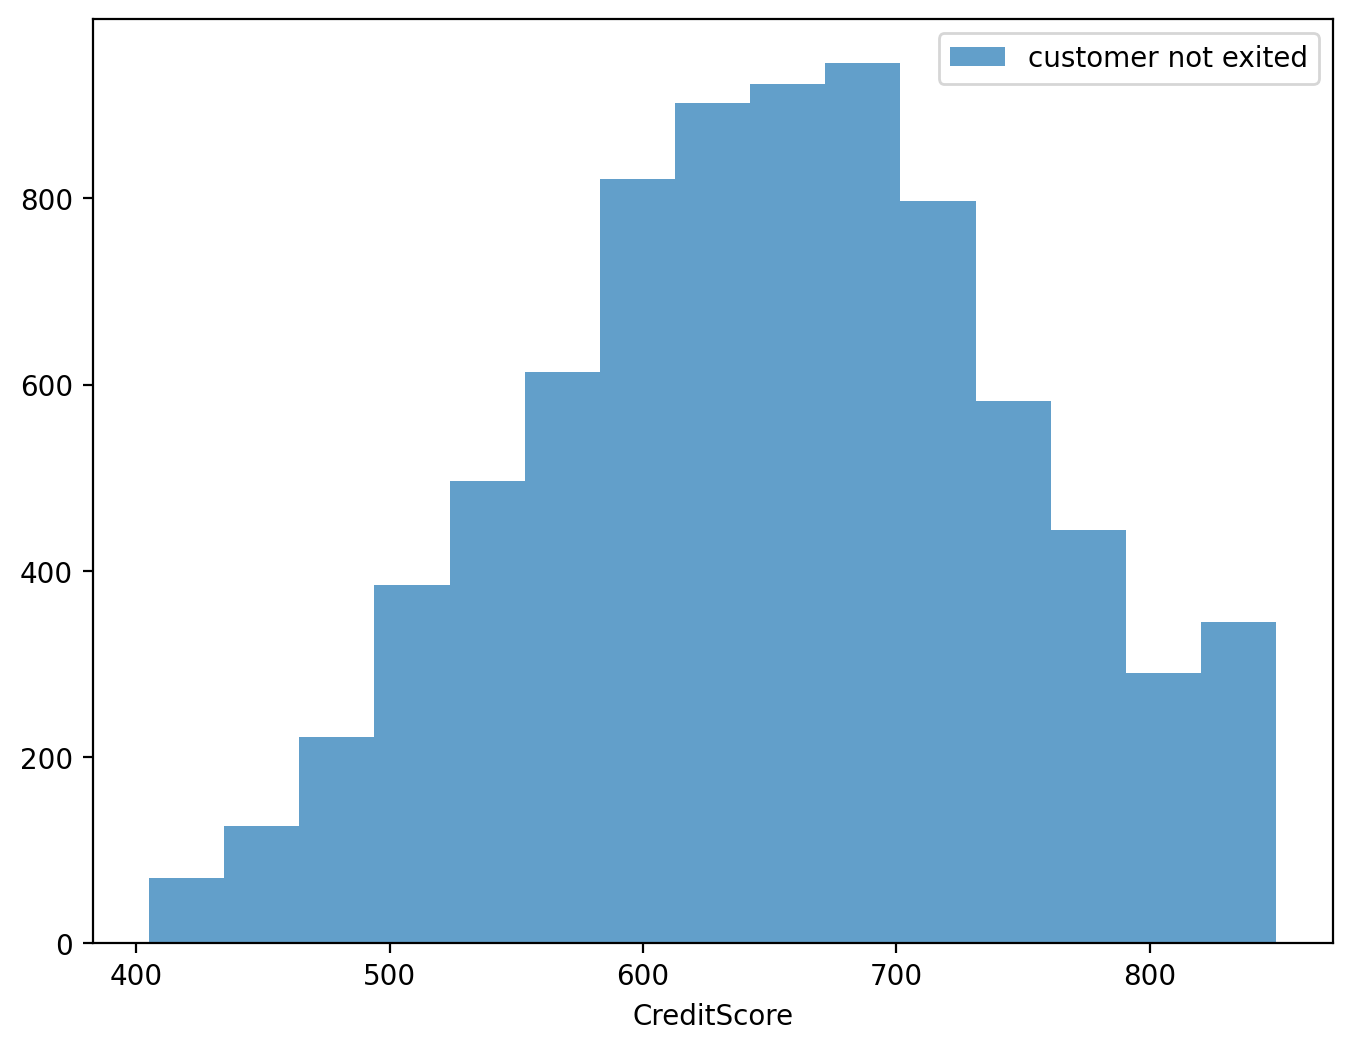

In [45]:
# distribution of the Credit Score for cust_nonexited
pyplot.figure(figsize=(8,6))
pyplot.xlabel('CreditScore')
pyplot.hist(cust_nonexited["CreditScore"],bins=15, alpha=0.7, label='customer not exited')
pyplot.legend(loc='upper right')
pyplot.show()

In [37]:
# Let's examine the credit score of the cust_exited group
cust_exited["CreditScore"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    2037.000000
mean      645.351497
std       100.321503
min       350.000000
5%        479.000000
25%       578.000000
50%       646.000000
75%       716.000000
90%       776.400000
95%       812.200000
99%       850.000000
max       850.000000
Name: CreditScore, dtype: float64

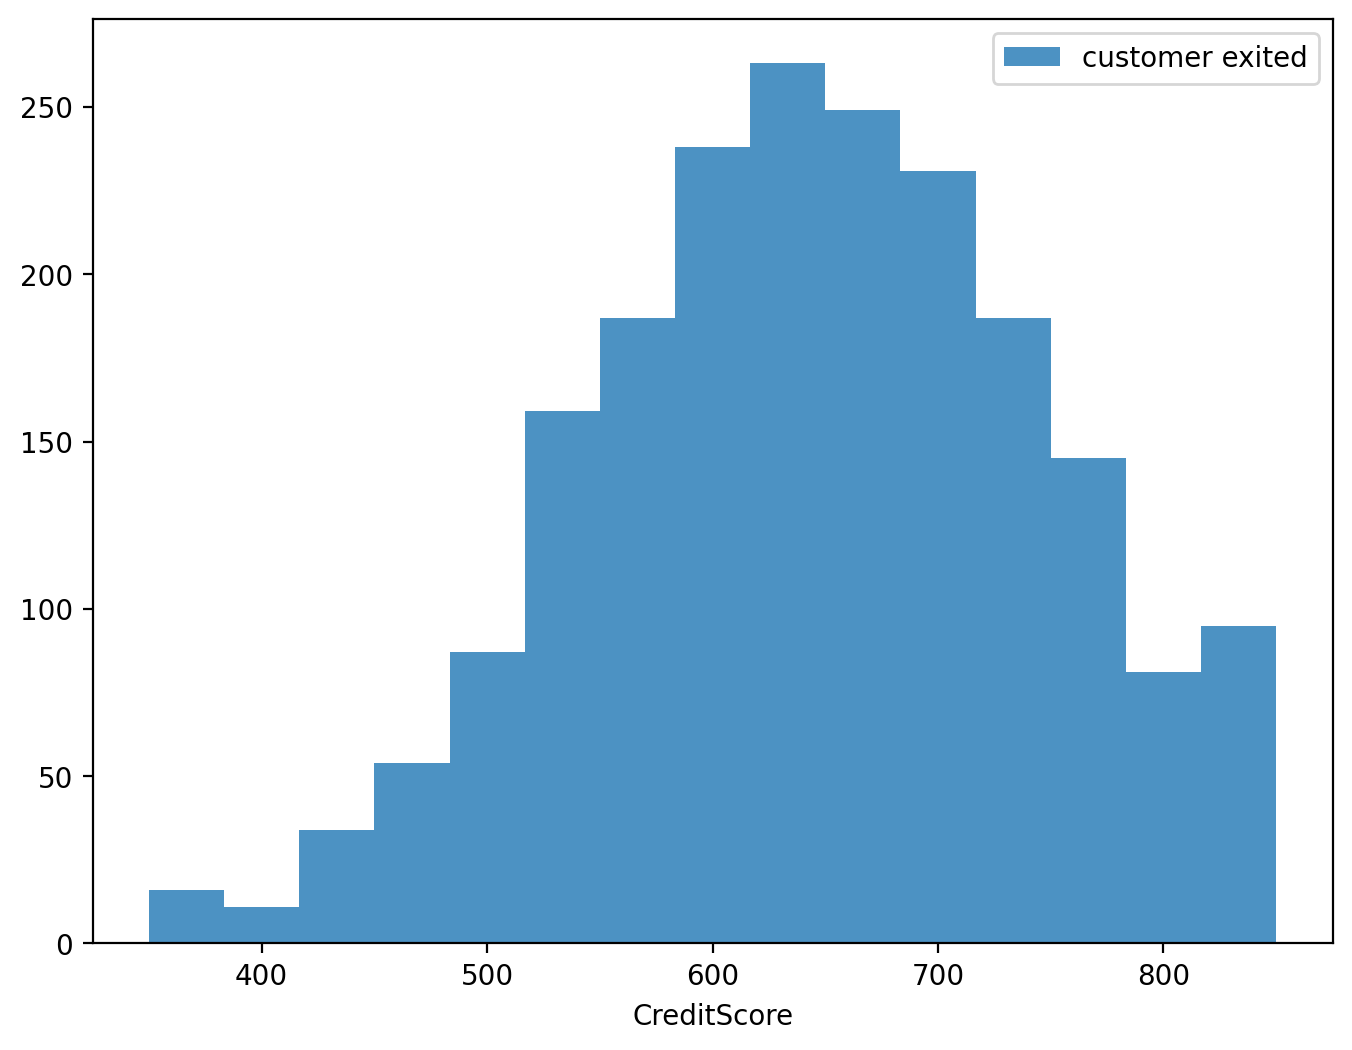

In [46]:
# distribution of the Credit Score for cust_exited
pyplot.figure(figsize=(8,6))
pyplot.xlabel('CreditScore')
pyplot.hist(cust_exited["CreditScore"],bins=15, alpha=0.8, label='customer exited')
pyplot.legend(loc='upper right')
pyplot.show()

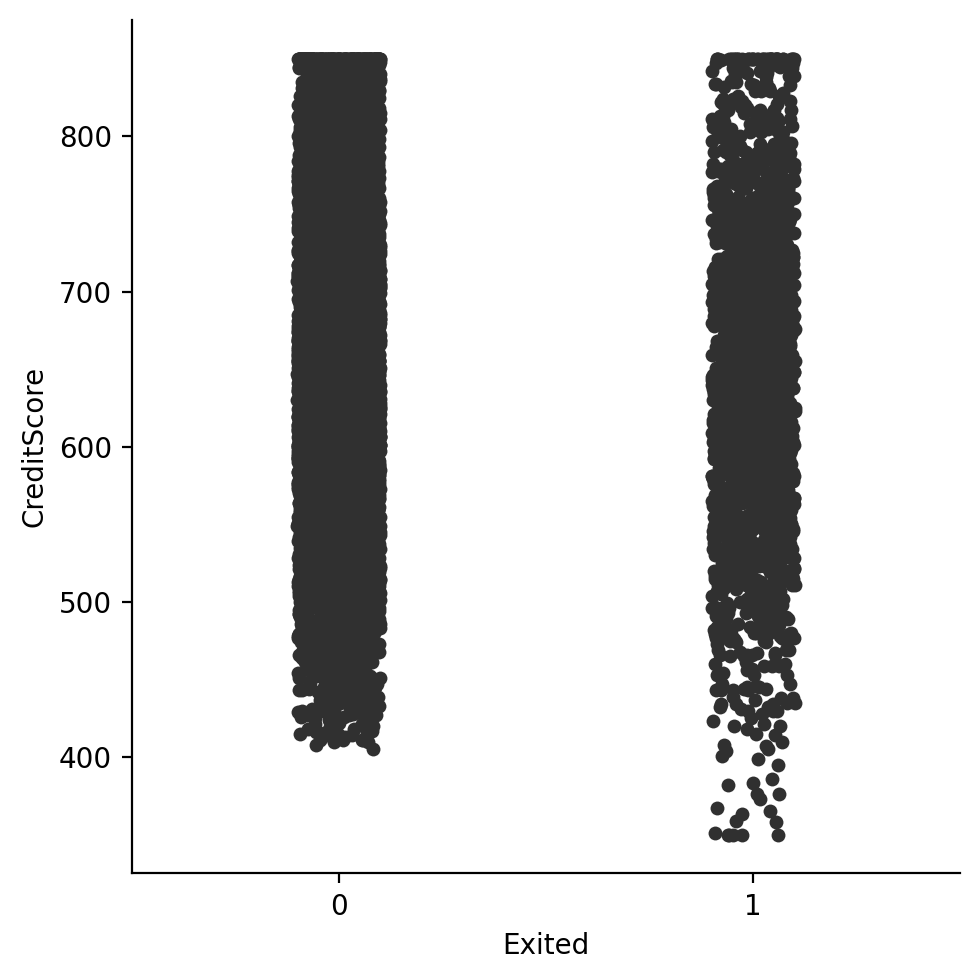

In [47]:
sns.catplot( x = "Exited", y="CreditScore" , data = df , color=".19")

# Age

In [48]:
# examining the age of the cust_nonexited group
cust_nonexited["Age"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    7963.000000
mean       37.408389
std        10.125363
min        18.000000
5%         24.000000
25%        31.000000
50%        36.000000
75%        41.000000
90%        49.000000
95%        59.000000
99%        73.000000
max        92.000000
Name: Age, dtype: float64

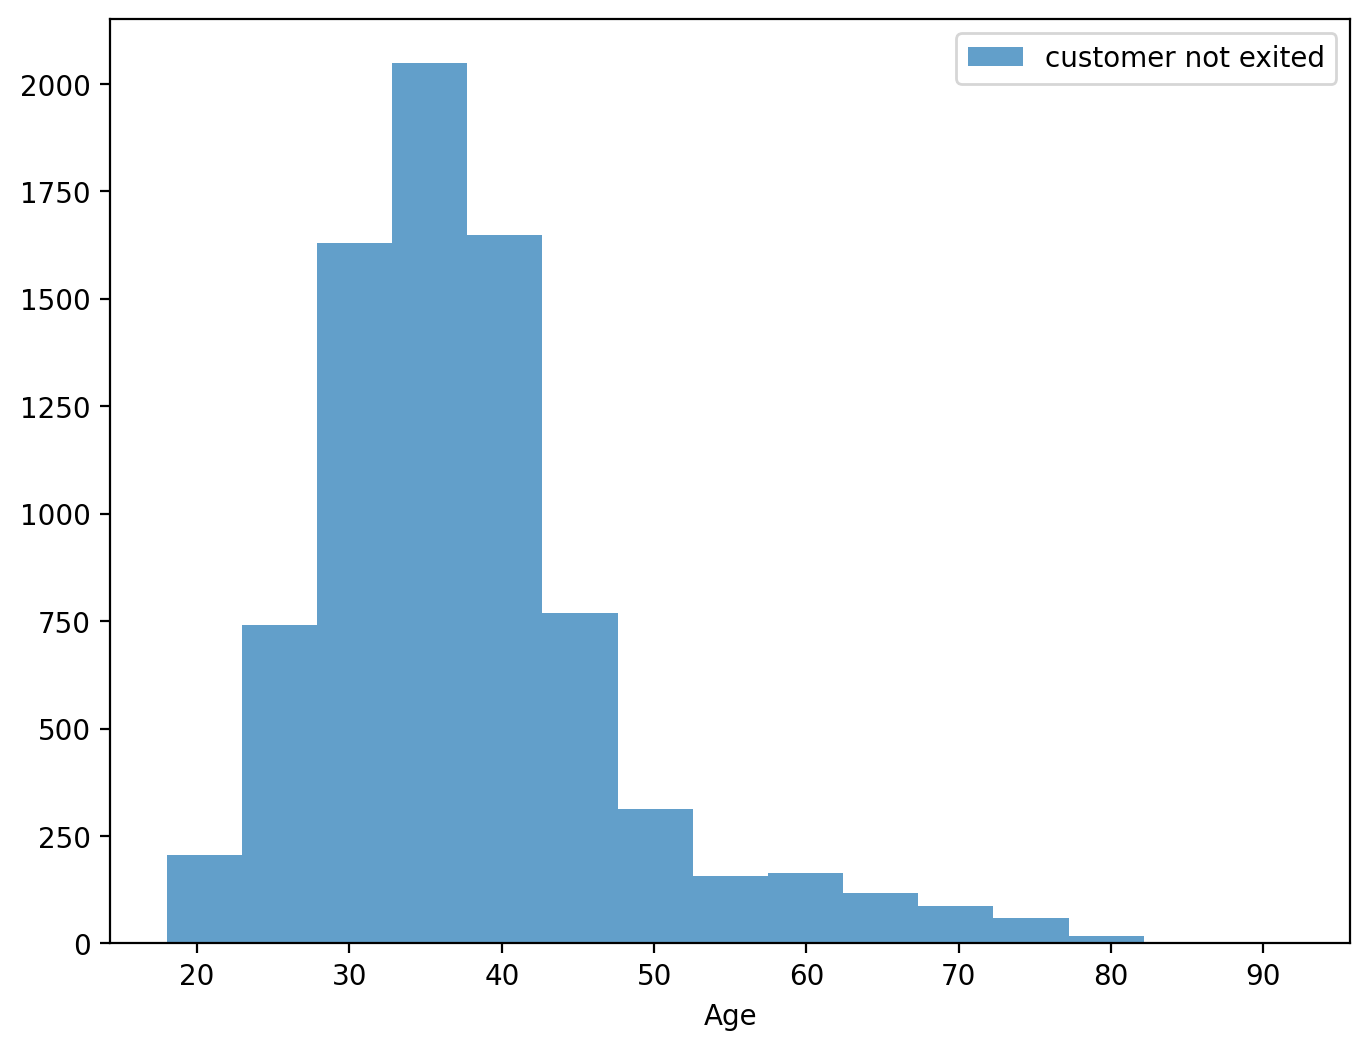

In [49]:
# distribution of the Age for cust_nonexited
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Age')
pyplot.hist(cust_nonexited["Age"],bins=15, alpha=0.7, label='customer not exited')
pyplot.legend(loc='upper right')
pyplot.show()

In [50]:
# examine the age of the cust_exited group
cust_exited["Age"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    2037.000000
mean       44.837997
std         9.761562
min        18.000000
5%         29.000000
25%        38.000000
50%        45.000000
75%        51.000000
90%        58.000000
95%        61.000000
99%        68.000000
max        84.000000
Name: Age, dtype: float64

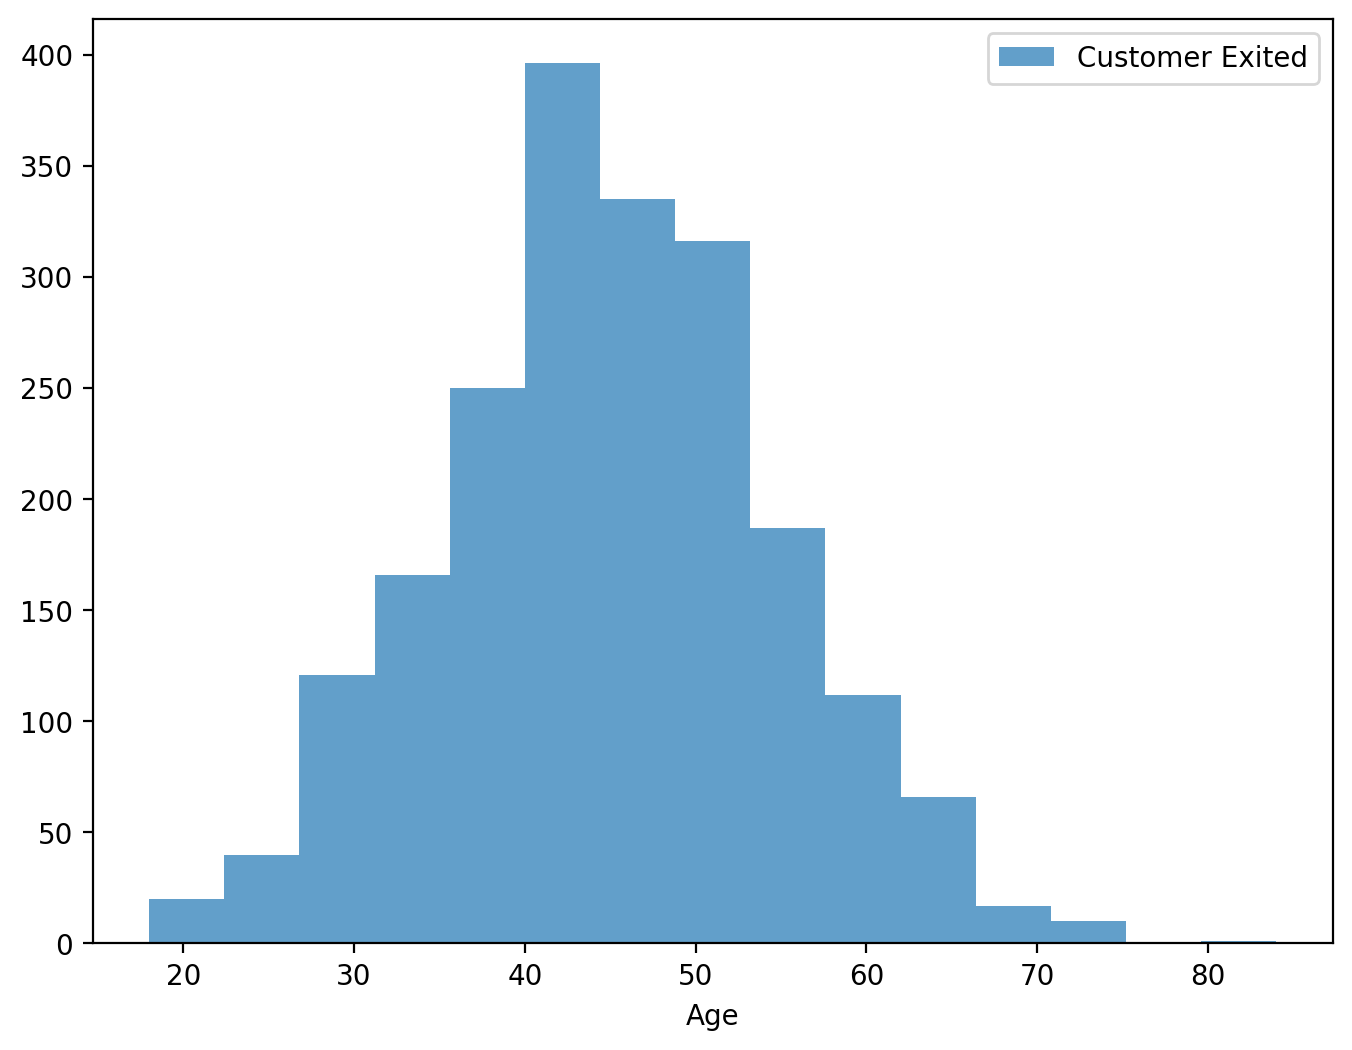

In [51]:
# distribution of the Age for cust_exited
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Age')
pyplot.hist(cust_exited["Age"],bins=15, alpha=0.7, label='Customer Exited')
pyplot.legend(loc='upper right')
pyplot.show()

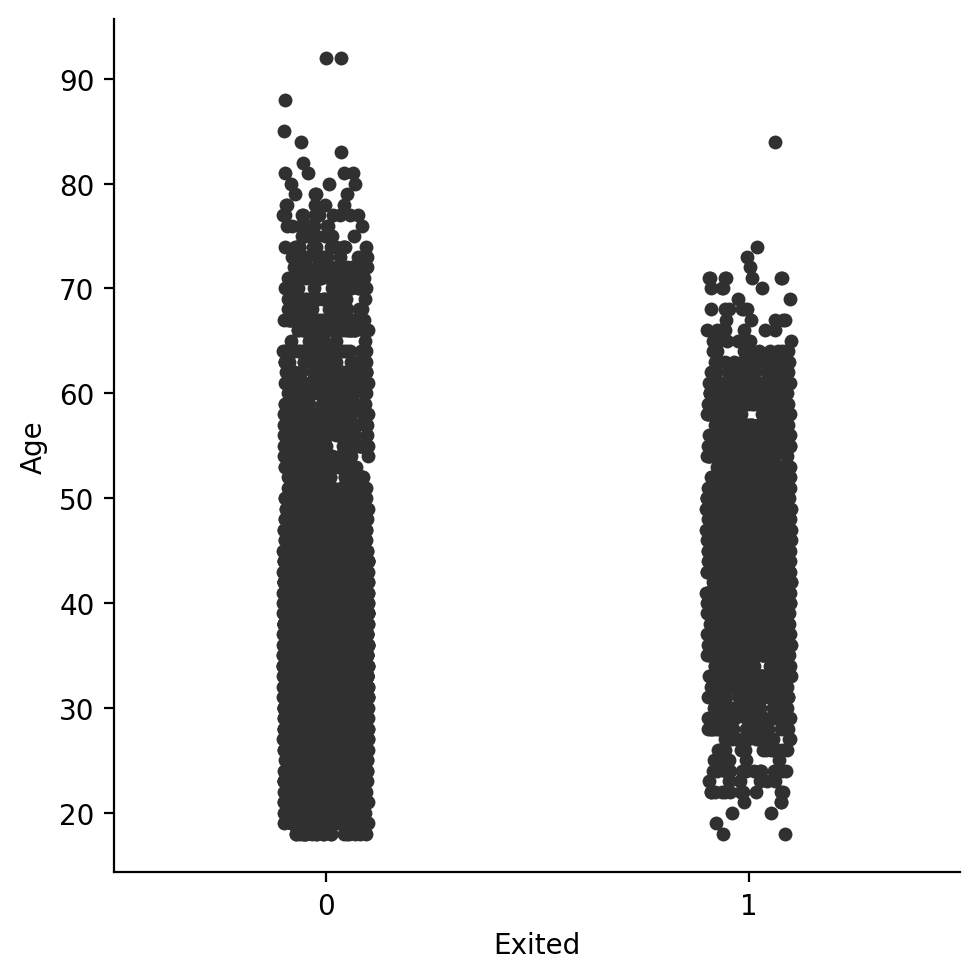

In [52]:
sns.catplot(x="Exited",y= "Age", data = df, color=".19")

# Balance

In [53]:
# examining the Balance of the cust_nonexited group
cust_nonexited["Balance"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count      7963.000000
mean      72745.296779
std       62848.040701
min           0.000000
5%            0.000000
25%           0.000000
50%       92072.680000
75%      126410.280000
90%      148730.298000
95%      161592.595000
99%      183753.906200
max      221532.800000
Name: Balance, dtype: float64

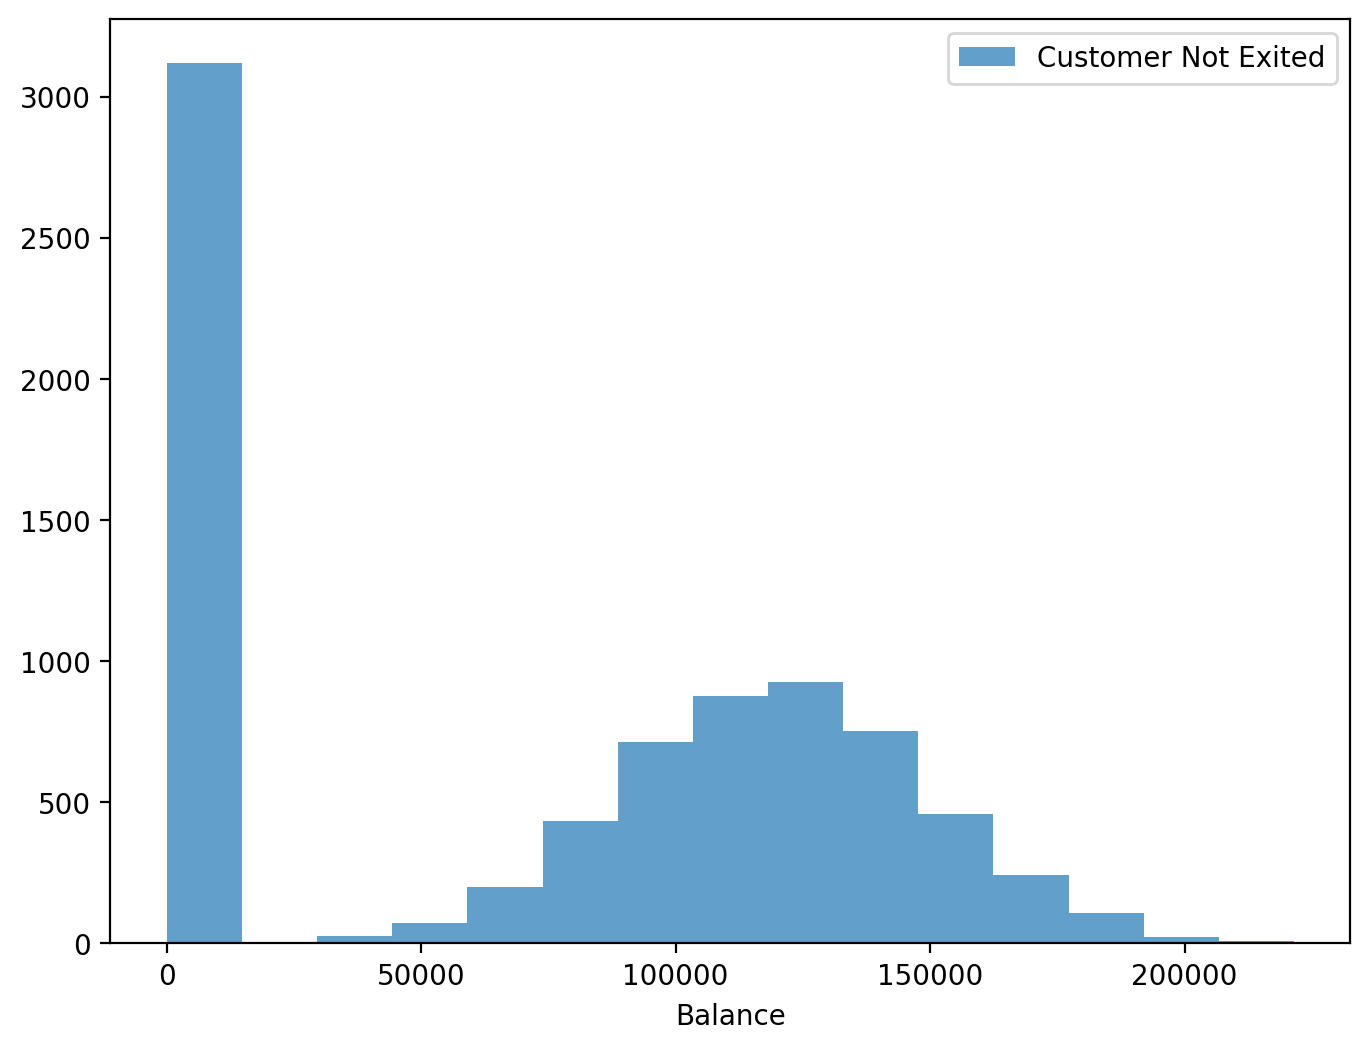

In [55]:
# distribution of the Balance for cust_nonexited
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Balance')
pyplot.hist(cust_nonexited["Balance"],bins=15, alpha=0.7, label='Customer Not Exited')
pyplot.legend(loc='upper right')
pyplot.show()

In [56]:
# examining the Balance of the cust_exited group
cust_exited["Balance"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count      2037.000000
mean      91108.539337
std       58360.794816
min           0.000000
5%            0.000000
25%       38340.020000
50%      109349.290000
75%      131433.330000
90%      152080.618000
95%      167698.240000
99%      197355.288400
max      250898.090000
Name: Balance, dtype: float64

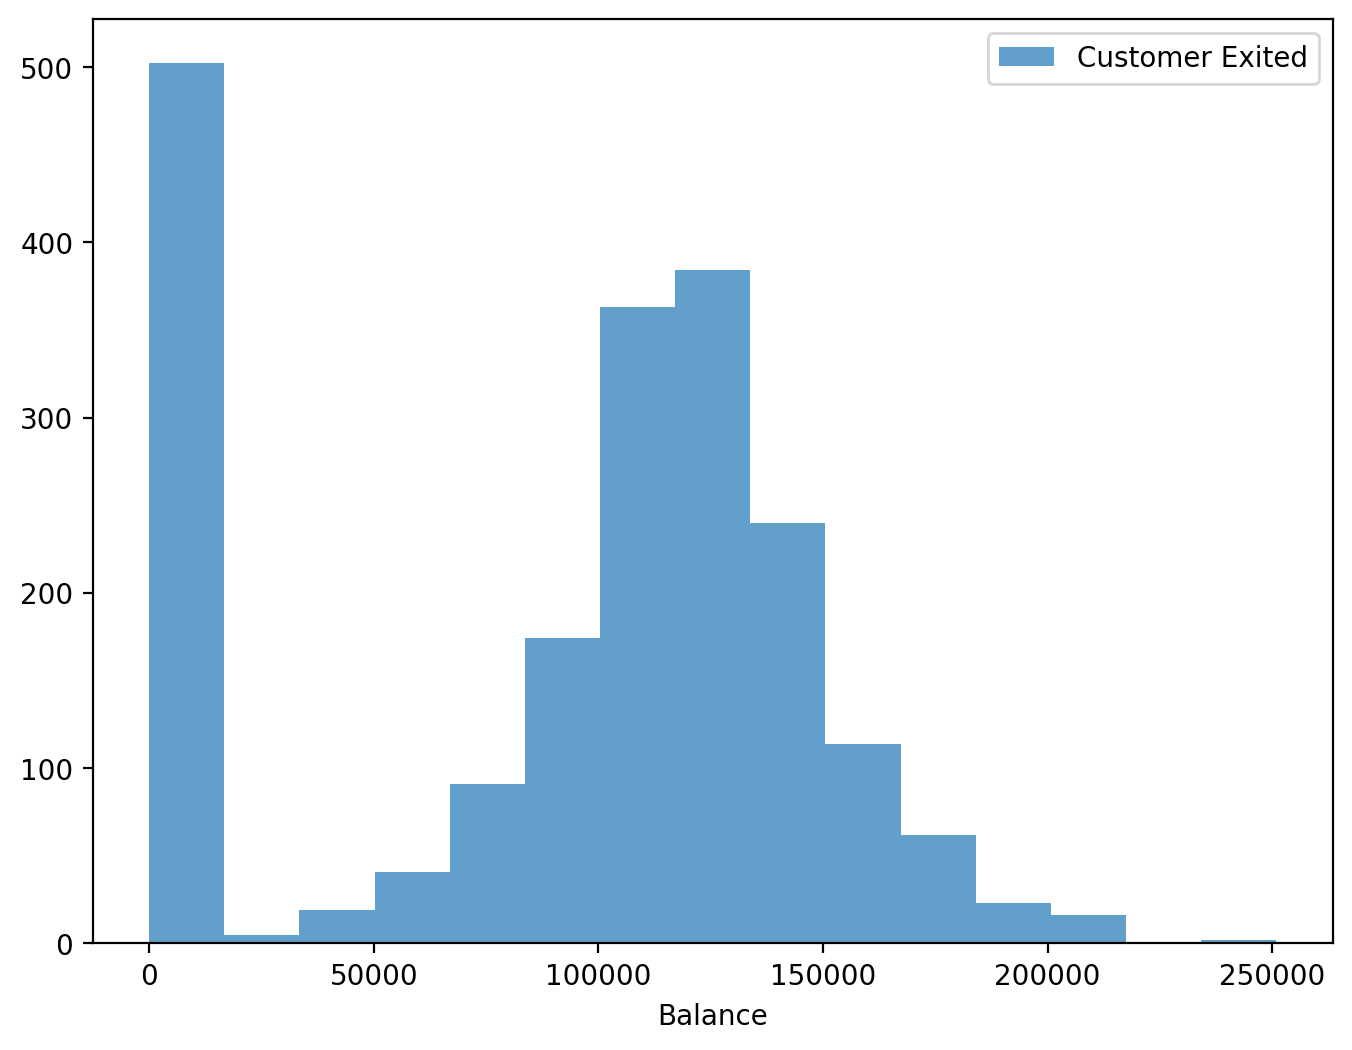

In [57]:
# distribution of the Balance for cust_exited
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Balance')
pyplot.hist(cust_exited["Balance"],bins=15, alpha=0.7, label='Customer Exited')
pyplot.legend(loc='upper right')
pyplot.show()

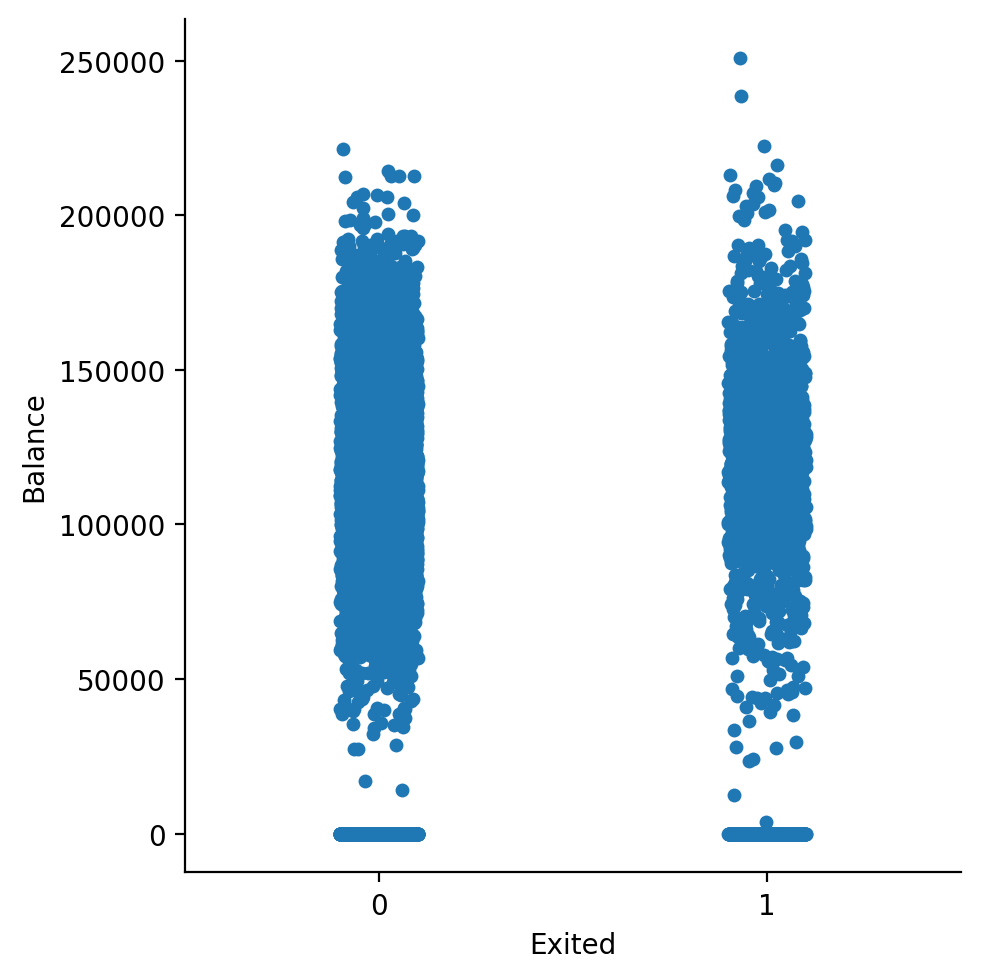

In [58]:
sns.catplot(x="Exited", y="Balance", data = df)

# EstimatedSalary

In [59]:
# examining the EstimatedSalary of the cust_nonexited group
cust_nonexited["EstimatedSalary"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count      7963.000000
mean      99738.391772
std       57405.586966
min          90.070000
5%         9773.542000
25%       50783.490000
50%       99645.040000
75%      148609.955000
90%      179453.212000
95%      190107.557000
99%      198131.465200
max      199992.480000
Name: EstimatedSalary, dtype: float64

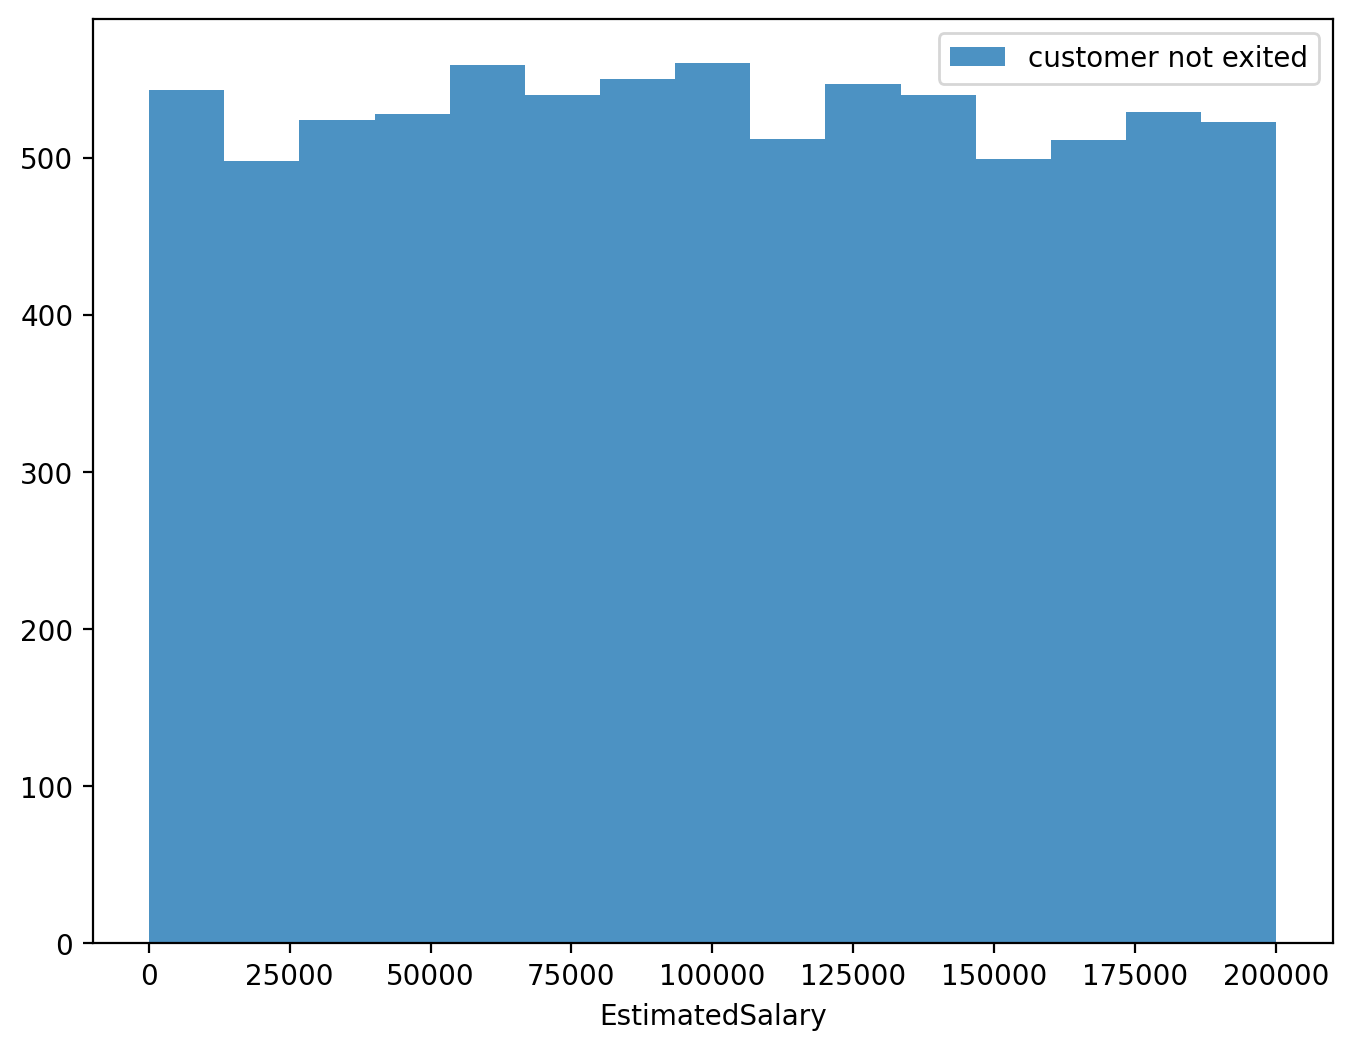

In [60]:
# distribution of the Balance for cust_nonexited
pyplot.figure(figsize=(8,6))
pyplot.xlabel('EstimatedSalary')
pyplot.hist(cust_nonexited["EstimatedSalary"],bins=15, alpha=0.8, label='customer not exited')
pyplot.legend(loc='upper right')
pyplot.show()

In [61]:
# examining the EstimatedSalary of the cust_exited group
cust_exited["EstimatedSalary"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count      2037.000000
mean     101465.677531
std       57912.418071
min          11.580000
5%        10030.760000
25%       51907.720000
50%      102460.840000
75%      152422.910000
90%      180169.390000
95%      190328.982000
99%      197717.297600
max      199808.100000
Name: EstimatedSalary, dtype: float64

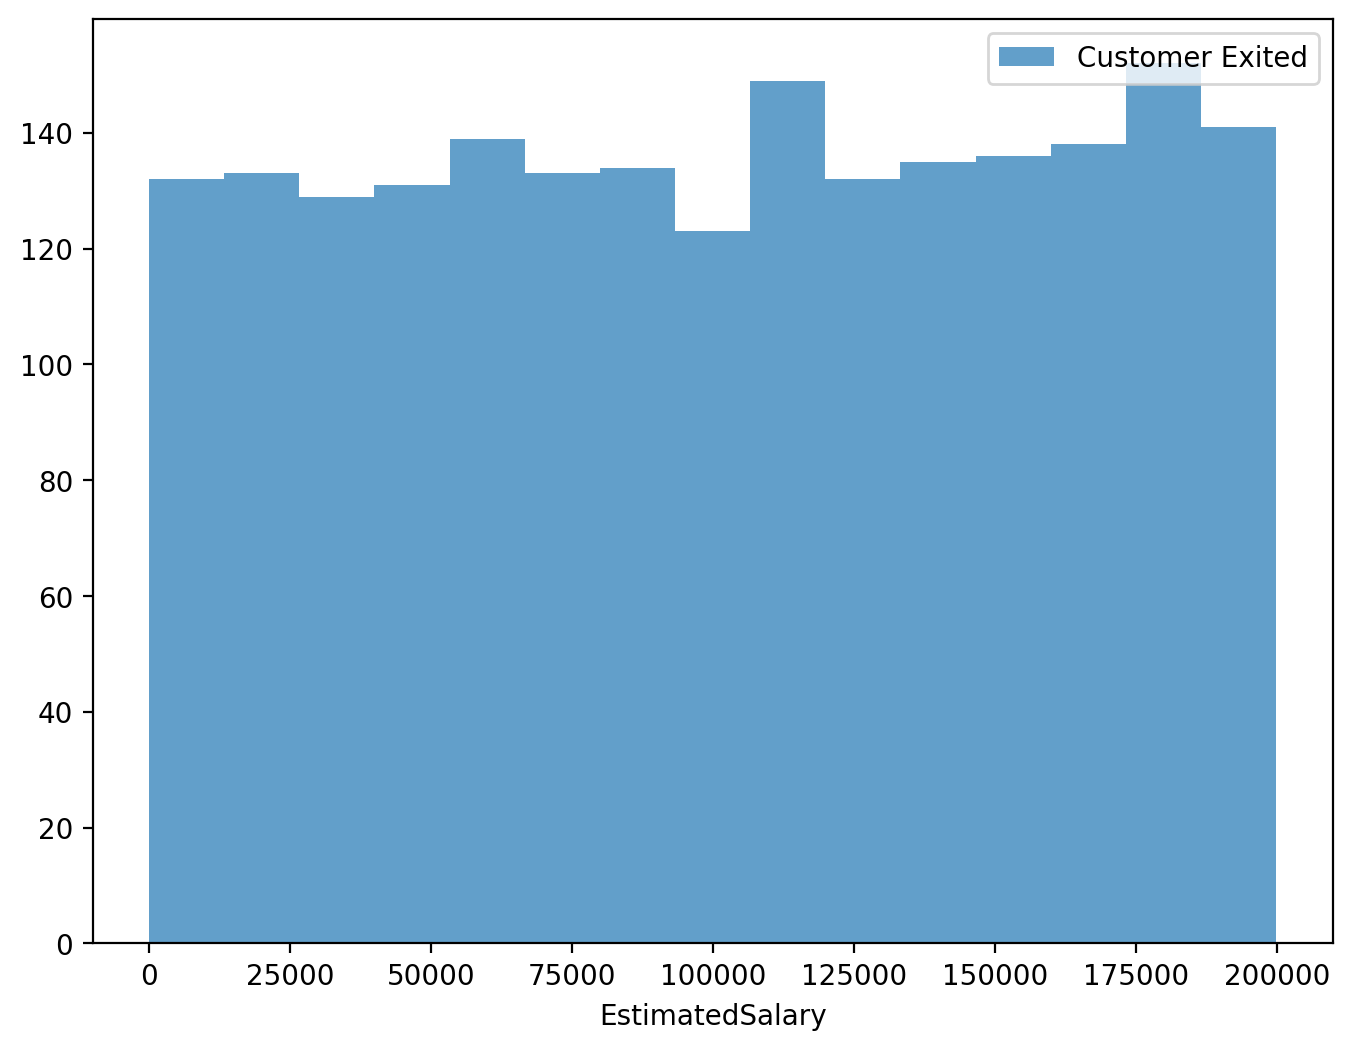

In [62]:
# distribution of the EstimatedSalary for cust_exited
pyplot.figure(figsize=(8,6))
pyplot.xlabel('EstimatedSalary')
pyplot.hist(cust_exited["EstimatedSalary"],bins=15, alpha=0.7, label='Customer Exited')
pyplot.legend(loc='upper right')
pyplot.show()

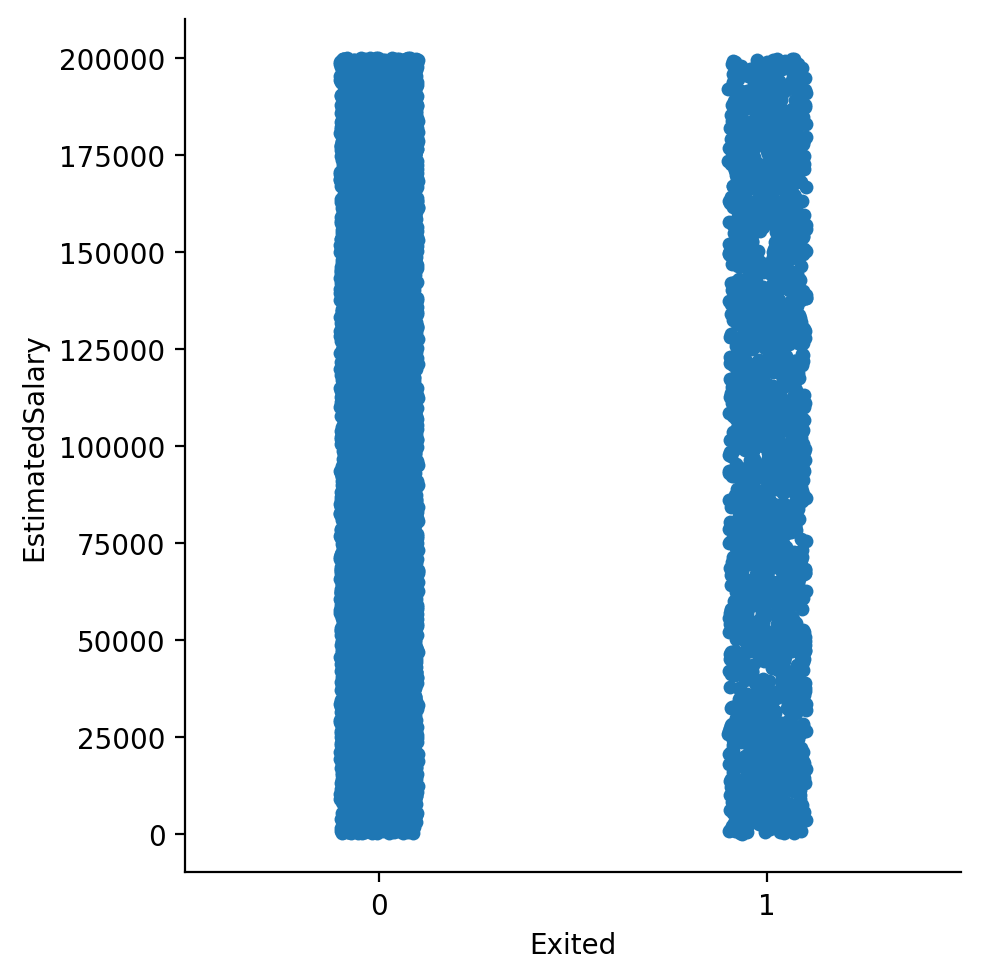

In [63]:
sns.catplot(x="Exited", y="EstimatedSalary", data = df)

# correlation matrix


A correlation matrix is a statistical technique used to evaluate 
the relationship between two variables in a data set. 
The matrix is a table in which every cell contains a correlation 
coefficient, where 1 is considered a strong relationship between 
variables, 0 a neutral relationship and -1 a not strong relationship. 
It’s most commonly used in building regression models. 

Now question arises When Do You Use the Correlation Matrix?
The correlation matrix gives you an idea about your data set.

For example, let’s say you want to predict the price of a car on the basis of fuel type,
transmission type or age, etc. A correlation matrix would be very useful.

Using a correlation matrix, we can evaluate the relationship between two variables:
If the relationship is 1, then the relationship is strong.
If the relationship is 0, then it means the relationship is neutral.
If the relationship is -1, then it means the relationship is negative or not strong.
By using a correlation matrix, you can better understand your data set, analyze it and visualize the result.
Most data scientists consider this the main step before building any machine learning model because if you know which variables are correlated which, you can gain a better understanding about what’s most important for your model.
The correlation matrix is a statistical technique that gives you the values between -1 to 1 which you can determine the relationship between variables.

In [102]:
data = {  
    "Exited":[0.05,0.25,0.50,0.75,0.90,0.95,0.99],
        "Age":[0.05,0.25,0.50,0.75,0.90,0.95,0.99],
        "Balance":[0.05,0.25,0.50,0.75,0.90,0.95,0.99],
        "EstimatedSalary":[0.05,0.25,0.50,0.75,0.90,0.95,0.99],
        "CustomerId":[ 0.05,0.25,0.50,0.75,0.90,0.95,0.99],
         "HasCrCard":[0.05,0.25,0.50,0.75,0.90,0.95,0.99],
         "Tenure":[0.05,0.25,0.50,0.75,0.90,0.95,0.99],
        "CreditScore":[0.05,0.25,0.50,0.75,0.90,0.95,0.99],
        "NumOfProducts":[0.05,0.25,0.50,0.75,0.90,0.95,0.99],
        "IsActiveMember":[0.05,0.25,0.50,0.75,0.90,0.95,0.99]
      
}

#load data into a DataFrame object:
df = pd.DataFrame(data,columns = ['Exited''Age','Balance','EstimatedSalary',
                                  'CustomerId','HasCrCard','Tenure','CreditScore','NumOfProducts','IsActiveMember'])

print(df) 

#columns=['Exited''Age','Balance','EstimatedSalary','CustomerId','HasCrCard','Tenure','CreditScore','NumOfProducts','IsActiveMember

  ExitedAge  Balance  EstimatedSalary  CustomerId  HasCrCard  Tenure  \
0       NaN     0.05             0.05        0.05       0.05    0.05   
1       NaN     0.25             0.25        0.25       0.25    0.25   
2       NaN     0.50             0.50        0.50       0.50    0.50   
3       NaN     0.75             0.75        0.75       0.75    0.75   
4       NaN     0.90             0.90        0.90       0.90    0.90   
5       NaN     0.95             0.95        0.95       0.95    0.95   
6       NaN     0.99             0.99        0.99       0.99    0.99   

   CreditScore  NumOfProducts  IsActiveMember  
0         0.05           0.05            0.05  
1         0.25           0.25            0.25  
2         0.50           0.50            0.50  
3         0.75           0.75            0.75  
4         0.90           0.90            0.90  
5         0.95           0.95            0.95  
6         0.99           0.99            0.99  


In [103]:
CorrMatrix = df.corr()
print(CorrMatrix)

                 ExitedAge  Balance  EstimatedSalary  CustomerId  HasCrCard  \
ExitedAge              NaN      NaN              NaN         NaN        NaN   
Balance                NaN      1.0              1.0         1.0        1.0   
EstimatedSalary        NaN      1.0              1.0         1.0        1.0   
CustomerId             NaN      1.0              1.0         1.0        1.0   
HasCrCard              NaN      1.0              1.0         1.0        1.0   
Tenure                 NaN      1.0              1.0         1.0        1.0   
CreditScore            NaN      1.0              1.0         1.0        1.0   
NumOfProducts          NaN      1.0              1.0         1.0        1.0   
IsActiveMember         NaN      1.0              1.0         1.0        1.0   

                 Tenure  CreditScore  NumOfProducts  IsActiveMember  
ExitedAge           NaN          NaN            NaN             NaN  
Balance             1.0          1.0            1.0             1.0  

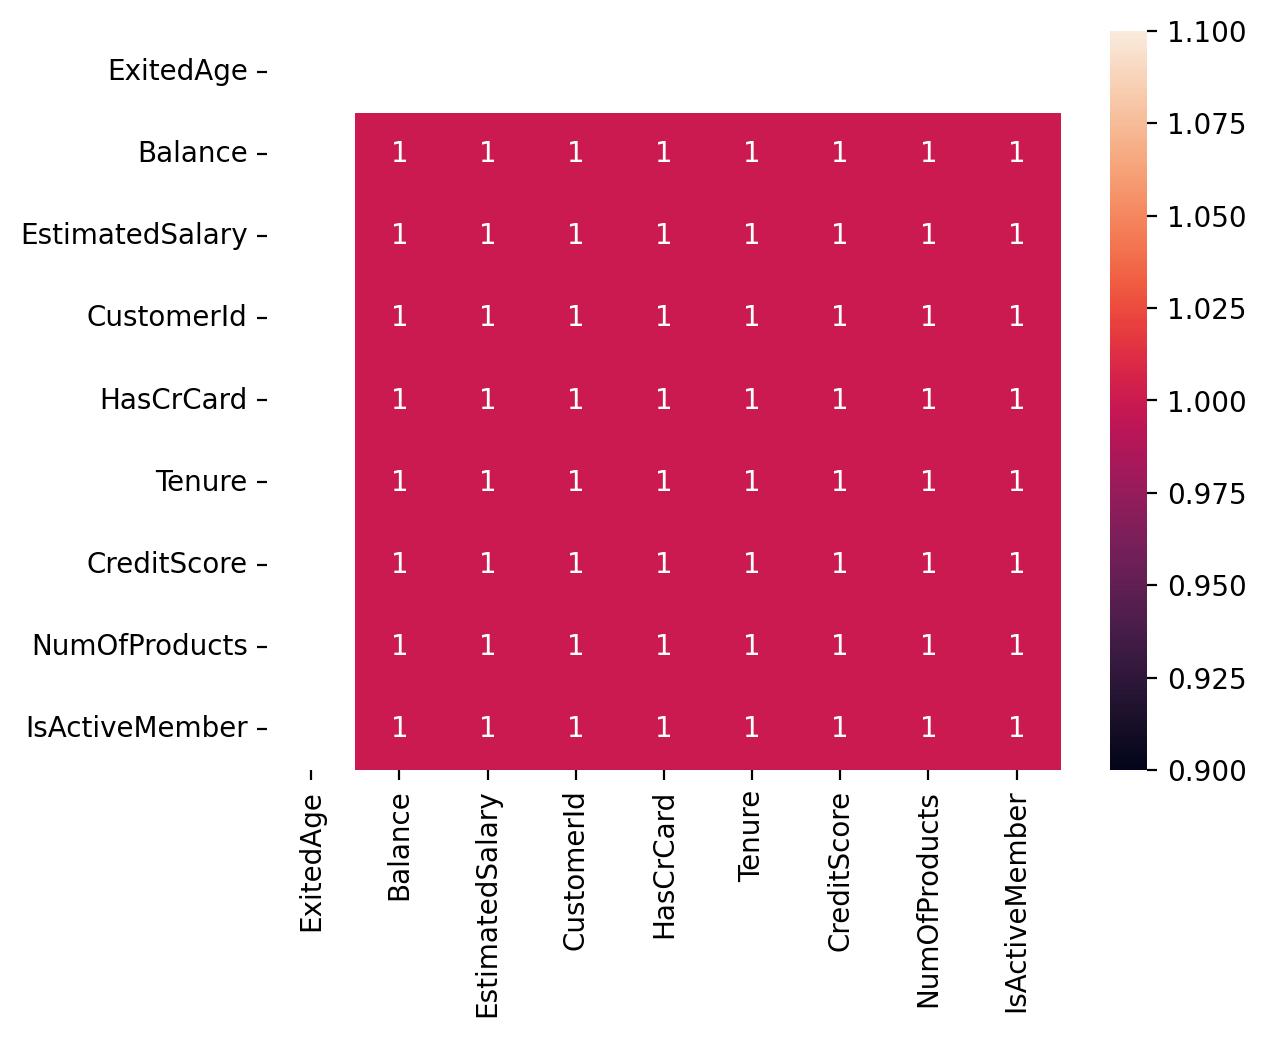

'"by following we can state which variables are highly correlated to each other.\nbut in this case i have done mistake. \n\nthe aim / the goal is to identify pattern which are highly correlate with each other.\nstill working on this ... \n\nWe can use the correlation matrix in the machine learning model to improve accuracy, \nand we can create a confusion matrix to understand the data.\n'

In [104]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

""""by following we can state which variables are highly correlated to each other.
but in this case i have done mistake. 

the aim / the goal is to identify pattern which are highly correlate with each other.
still working on this ... 

We can use the correlation matrix in the machine learning model to improve accuracy, 
and we can create a confusion matrix to understand the data.
"""

# Data Preprocessing

# Missing Value

In [80]:
# Missing Observation Analysis
df.isnull().sum()

ExitedAge          7
Balance            0
EstimatedSalary    0
CustomerId         0
HasCrCard          0
Tenure             0
CreditScore        0
NumOfProducts      0
IsActiveMember     0
dtype: int64

In [92]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [91]:
df = pd.read_csv('C:/Users/gb/Downloads/Task/t1/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [95]:
#Encoding categorical variables:
X = pd.get_dummies(df, drop_first=True)

In [96]:
#Scaling continuous variables:
sc = MinMaxScaler()
a = sc.fit_transform(df[['Tenure']])
b = sc.fit_transform(df[['EstimatedSalary']])
X['Tenure'] = a
X['EstimatedSalary'] = b

In [98]:
#new dimension of the dataset:
X.shape

(10000, 2945)

Text(0.5, 1.0, 'Class Distribution Before Resampling')

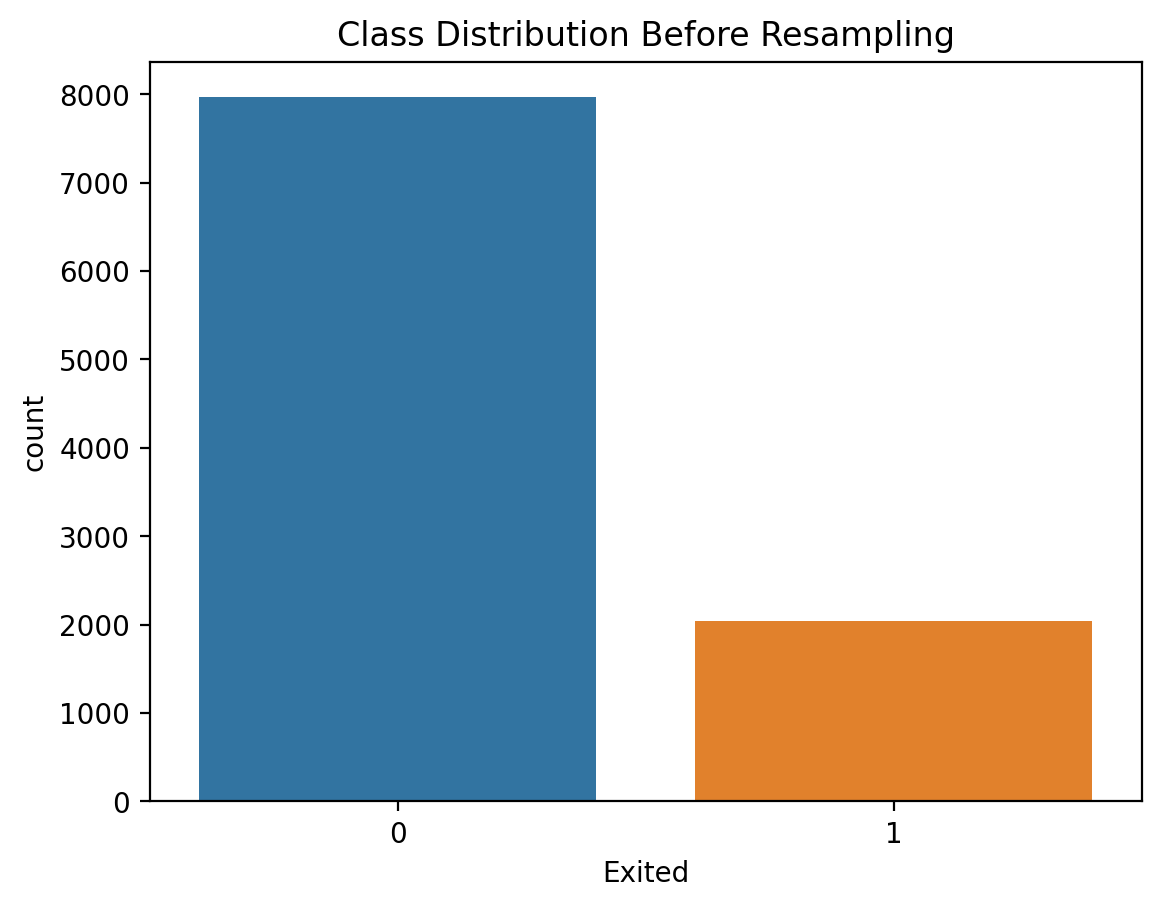

In [119]:
df = pd.read_csv('C:/Users/gb/Downloads/Task/t1/Churn_Modelling.csv')
sns.countplot(x=df["Exited"]).set_title('Class Distribution Before Resampling')

In [120]:
#Separating customer exited = 1 / yes  and customer not exited = 0 / no :
X_no = X[X.Exited == 0]
X_yes = X[X.Exited == 1]

In [121]:
#Upsampling the customer exited class:

X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

7963


In [165]:
#pip install pandas_datareader
pip install scikit-learn


SyntaxError: invalid syntax (2523088755.py, line 2)

7963


Text(0.5, 1.0, 'Class Distribution After Resampling')

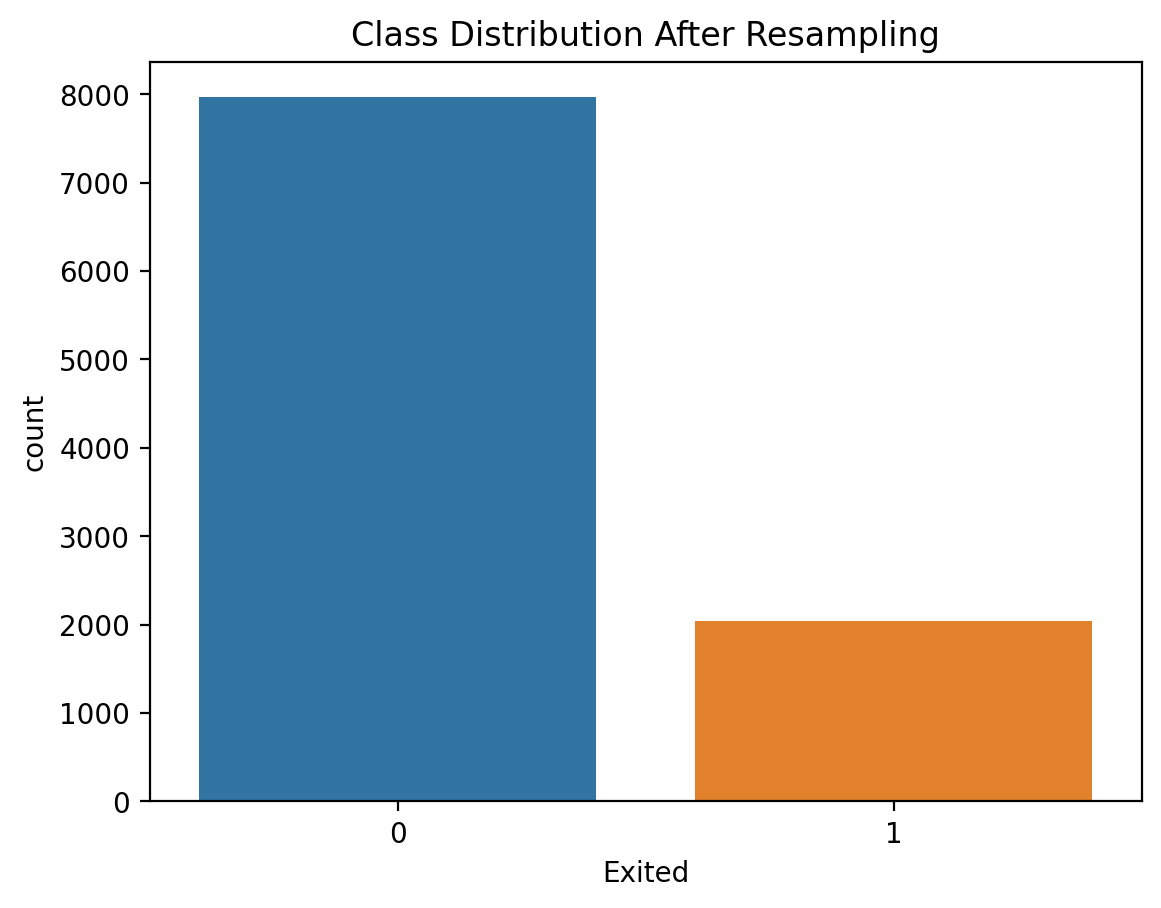

In [140]:
#Combining customer exited and not exited class and checking class distribution:
import pandas_datareader

X_no = X[X.Exited == 0]
X_yes = X[X.Exited == 1]

X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

X_upsampled = pd.concat([X_no,X_yes_upsampled]).reset_index(drop=True)
sns.countplot(x=df['Exited'], data=X_upsampled).set_title('Class Distribution After Resampling')

# Model Creation and Evaluation

In [141]:
from sklearn.model_selection import train_test_split
X = X_upsampled.drop(['Exited'], axis=1) #features (independent variables)
y = X_upsampled['Exited'] #target (dependent variable)

In [142]:
#Dividing dataset into train and test subsets:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [143]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

#Creating a ridge classifier object and training it:

clf_ridge = RidgeClassifier() #create a ridge classifier object
clf_ridge.fit(X_train, y_train) #train the model

RidgeClassifier()

In [144]:
#Making predictions on training set and evaluating:

pred = clf_ridge.predict(X_train)
accuracy_score(y_train, pred)

0.8324960753532182

In [145]:
#Making predictions on test set and evaluating:

pred_test = clf_ridge.predict(X_test)
accuracy_score(y_test, pred_test)

0.790646578782172

In [205]:
#Performance measurements of Logistic regression
#import library packages
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

#Load given dataset 

data = pd.read_csv('C:/Users/gb/Downloads/Task/t1/Churn_Modelling.csv')
df=data.dropna() 
df.columns

#According to the cross-validated MCC scores, the random forest is the best-performing 
#model, so now let's evaluate its performance on the test set.

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score 
del df["RowNumber"] 
del df["CustomerId"] 
del df["Surname"]
from sklearn.preprocessing import LabelEncoder

var_mod = ['Geography','Gender'] 
le =LabelEncoder() 
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)
    X = df.drop(labels='Exited', axis=1)
#Response variable
    y = df.loc[:,'Exited']
#We'll use a test size of 30%. We also stratify the split on the response variable, which is
#very important to do because there are so few fraudulent transactions.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,
stratify=y)


In [206]:

#Logistic Regression :
from sklearn.metrics import accuracy_score,confusion_matrix 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score

logR= LogisticRegression()
logR.fit(X_train,y_train)
predictR = logR.predict(X_test)

print("")
print('Classification report of Logistic Regression Results:')
print("")
print(classification_report(y_test,predictR))
print("")
cm=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Logistic Regression is:\n',cm)
print("")
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity ) 
print("")
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
print("")
accuracy = cross_val_score(logR, X, y,scoring='accuracy') 
print('Cross validation test results of accuracy:') 
print(accuracy) #get the mean of each fold
print("")
print("Accuracy result of Logistic Regression is:",accuracy.mean() *100) 
LR=accuracy.mean() * 100 



Classification report of Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      2389
           1       0.42      0.05      0.09       611

    accuracy                           0.79      3000
   macro avg       0.61      0.52      0.49      3000
weighted avg       0.72      0.79      0.72      3000


Confusion Matrix result of Logistic Regression is:
 [[2344   45]
 [ 579   32]]

Sensitivity :  0.981163666806195

Specificity :  0.05237315875613748

Cross validation test results of accuracy:
[0.7915 0.791  0.793  0.789  0.7885]

Accuracy result of Logistic Regression is: 79.06


In [207]:
#Performance measurements of Random Forest classifier:

from sklearn.metrics import accuracy_score,confusion_matrix 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
predictR = rfc.predict(X_test)
print("")
print('Classification report of Random Forest Classifier Results:')
print("")
print(classification_report(y_test,predictR))
print("")
cm=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Random Forest Classifier is:\n',cm)
print("")
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )
print("")
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)
print("")

accuracy = cross_val_score(rfc, X, y,scoring='accuracy') 
print('Cross validation test results of accuracy:') 
print(accuracy) 
print("")
print("Accuracy result of Random Forest Classifier is:",accuracy.mean() *100) 
LR=accuracy.mean() * 100 


Classification report of Random Forest Classifier Results:

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2389
           1       0.77      0.45      0.56       611

    accuracy                           0.86      3000
   macro avg       0.82      0.71      0.74      3000
weighted avg       0.85      0.86      0.84      3000


Confusion Matrix result of Random Forest Classifier is:
 [[2308   81]
 [ 339  272]]

Sensitivity :  0.9660946002511511

Specificity :  0.4451718494271686

Cross validation test results of accuracy:
[0.8545 0.871  0.8605 0.8635 0.857 ]

Accuracy result of Random Forest Classifier is: 86.13000000000002


TruePositive : 2308
TrueNegative : 81
False Positive : 339
False Negative: 272

True Positive Rate : 0.8945736434108527
True Negative Rate : 0.19285714285714287
False PositiveRate : 0.8071428571428572
False NegativeRate : 0.10542635658914729

Positive Predictive Value : 0.8719304873441632
Negative predictive value : 0.22946175637393768


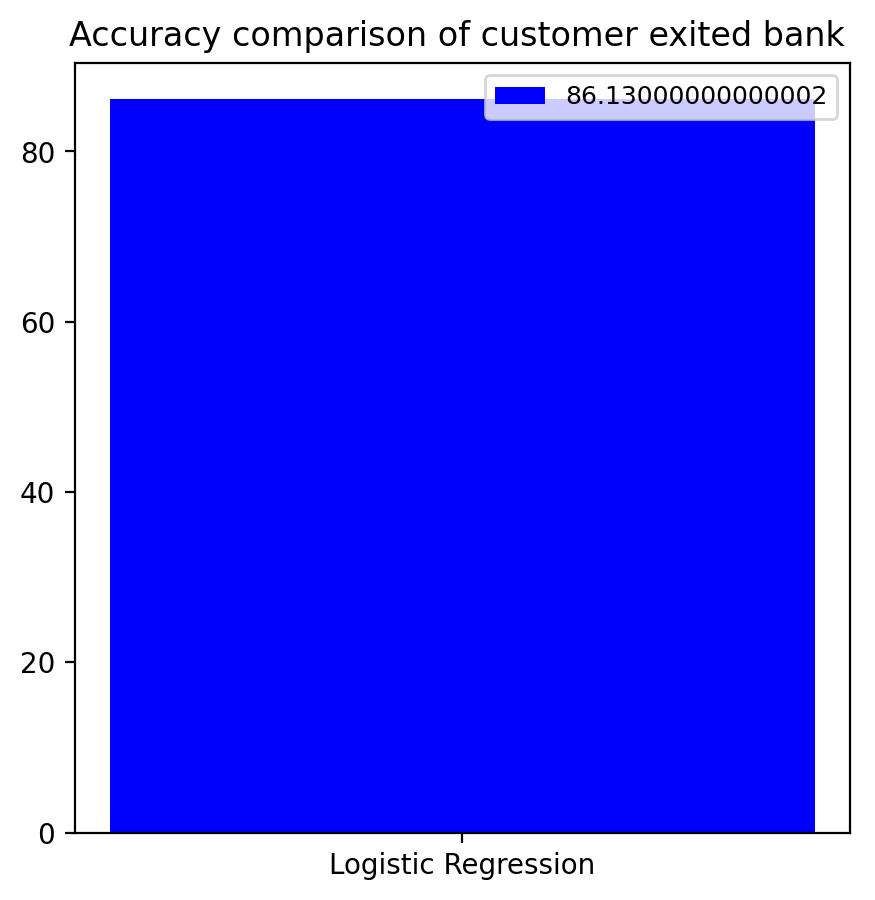

In [211]:
#Logistic Regression
def graph(): 
    data=[LR] 
    alg="Logistic Regression" 
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("b"))
    plt.title("Accuracy comparison of customer exited bank ")
    plt.legend(b,data,fontsize=9)
graph()
TP = cm[0][0]
FP = cm[1][0]
FN = cm[1][1] 
TN =cm[0][1] 
print("TruePositive :",TP) 
print("TrueNegative :",TN)
print("False Positive :",FP)
print("False Negative:",FN) 
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN) 
FNR =FN/(TP+FN) 
print("True Positive Rate :",TPR) 
print("True Negative Rate :",TNR) 
print("False PositiveRate :",FPR) 
print("False NegativeRate :",FNR) 
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV) 
print("Negative predictive value :",NPV)

True Positive : 2308
True Negative : 81
False Positive : 339
False Negative: 272

True Positive 66 Rate : 0.8945736434108527
True Negative Rate : 0.19285714285714287
False Positive Rate : 0.8071428571428572
False Negative Rate : 0.10542635658914729

Positive Predictive Value : 0.8719304873441632
Negative predictive value : 0.22946175637393768


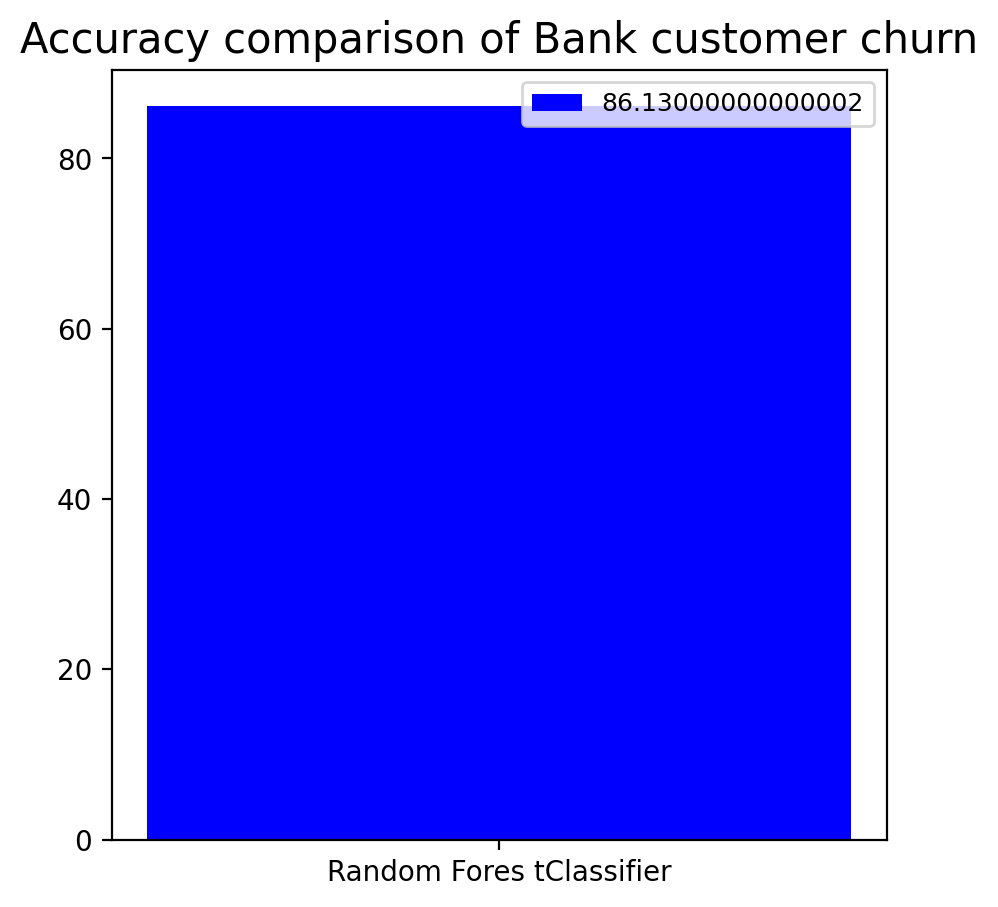

In [209]:
def graph(): 
    data=[LR]
    alg="Random Fores tClassifier"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("b"))
    plt.title("Accuracy comparison of Bank customer exited",fontsize=15)
    plt.legend(b,data,fontsize=9)
graph()
TP = cm[0][0]
FP = cm[1][0]
FN = cm[1][1] 
TN = cm[0][1] 
print("True Positive :",TP) 
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative:",FN) 
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN) 
FNR =FN/(TP+FN) 
print("True Positive 66 Rate :",TPR) 
print("True Negative Rate :",TNR) 
print("False Positive Rate :",FPR) 
print("False Negative Rate :",FNR) 
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

Confusion matrix-LogisticRegression:
[[2308   81]
 [ 339  272]]


<Axes: >

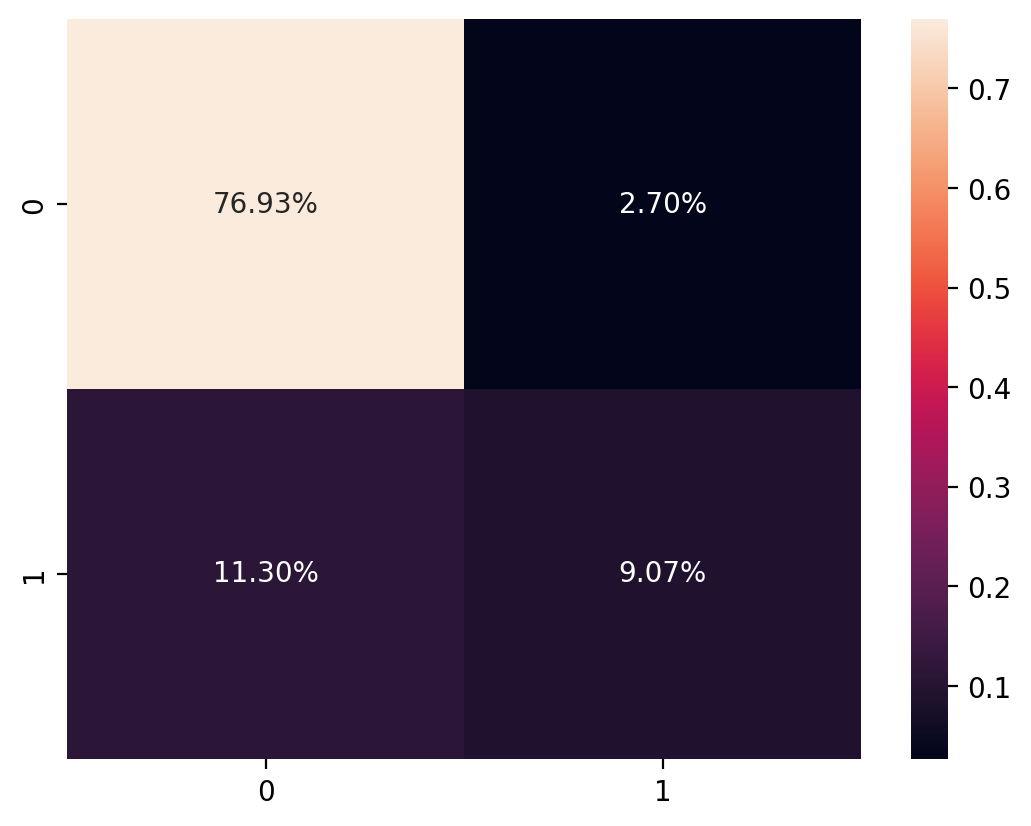

In [212]:
def plot_confusion_matrix(cm2, title='Confusion matrix-LogisticRegression',cmap=plt.cm.Blues):
        target_names=['Predict','Actual']
        plt.imshow(cm2, interpolation='nearest',cmap=cmap) 
        plt.title(title) 
        plt.colorbar()
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
        plt.tight_layout()
        plt.ylabel('True label') 
        plt.xlabel('Predicted label')
cm2=confusion_matrix(y_test, predictR)
print('Confusion matrix-LogisticRegression:')
print(cm2)
sns.heatmap(cm2/np.sum(cm2), annot=True, fmt ='.2%')

Confusion matrix-RandomForestClassifier:
[[2308   81]
 [ 339  272]]


['model.pkl']

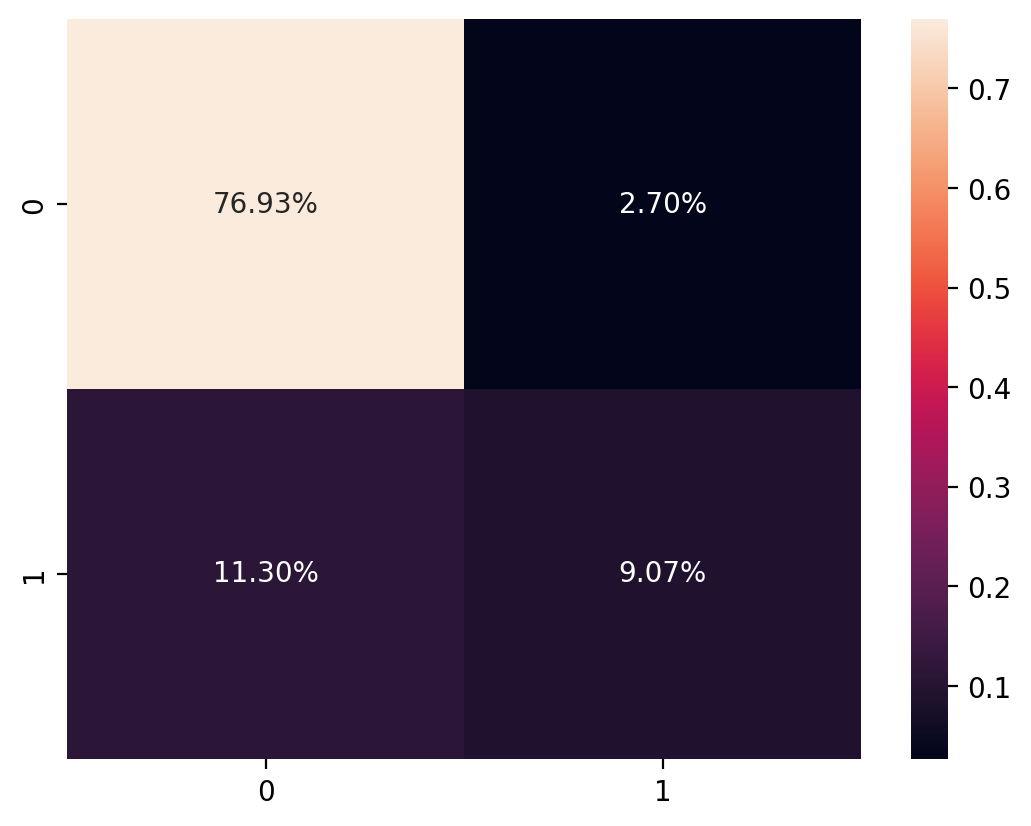

In [213]:
def plot_confusion_matrix(cm2, title='Confusion matrix-RandomForestClassifier',cmap=plt.cm.Blues):
    target_names=['Predict','Actual']
    plt.imshow(cm2, interpolation='nearest',cmap=cmap) 
    plt.title(title) 
    plt.colorbar()
    tick_marks = np.arange(len(target_names)) 
    plt.xticks(tick_marks, target_names,rotation=45) 
    plt.yticks(tick_marks,target_names) 
    plt.tight_layout() 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
cm2=confusion_matrix(y_test, predictR)
print('Confusion matrix-RandomForestClassifier:')
print(cm2)
sns.heatmap(cm2/np.sum(cm2), annot=True, fmt='.2%') 
import joblib 
joblib.dump(rfc,"model.pkl")

# Conclusion
The analytical process started from data cleaning and processing, missing value,
exploratory analysis and finally model building and evaluation. The best accuracy on a public
test set is a higher accuracy score will be found out. This application can help to find the
Prediction of Bank Churn, which helps to give more support to customers.

Import packages => Read Data => Split train/test Data => implementing Algo